In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
PassengerId = test['PassengerId']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 今後の処理を簡潔にするためfull_dataを作成

In [3]:
full_data = [train, test]
full_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

## ①欠損値の確認と処理

In [4]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 型確認

In [6]:
print(type(train['Cabin'][0]))
print(type(train['Cabin'][1]))

<class 'float'>
<class 'str'>


### Cabinの欠損値を0、欠損値でなければ1として新しい変数に代入

In [7]:
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x) == float else 1) # NaNはfloat型。それ以外はstr型。
test['Has_Cabin'] = test['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [8]:
train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Has_Cabin
Embarked,,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69,168
Q,77,77,77,77,77,28,77,77,77,77,4,77
S,644,644,644,644,644,554,644,644,644,644,129,644


### 'Embarked'の欠損値を一番多い'S'で補完。

In [9]:
train['Embarked'] = train['Embarked'].fillna('S')

In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.217703
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.413179
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


### Fareの欠損値を中央値で補完

In [11]:
test['Fare'] = test['Fare'].fillna((train['Fare'].median()+test['Fare'].median())/2)

### Ageの欠損値を補完

In [12]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age']=dataset['Age'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Has_Cabin        0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Has_Cabin        0
dtype: int64


## ②説明変数同士の関係を図を用いて確認してみる

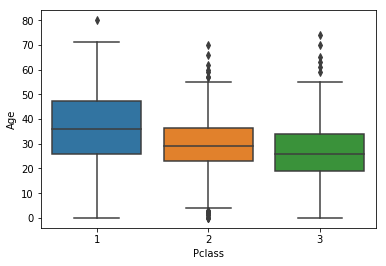

In [14]:
sns.boxplot(data=train, x='Pclass', y='Age')
plt.show()

- Pclassがいい人は年齢高い傾向にあることが分かる。(1 = 1st, 2 = 2nd, 3 = 3rd)

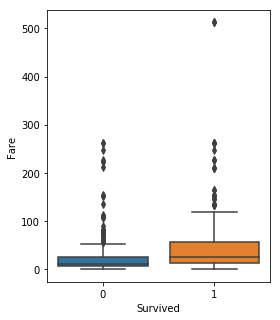

In [15]:
plt.figure(figsize=(4, 5))
sns.boxplot(data=train, x='Survived', y='Fare')
plt.show()

- 運賃が高い人は生き残っている人が多い傾向にある。

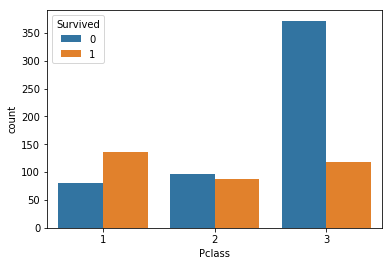

In [16]:
# チケットのランク毎の生存/死亡者数を棒グラフで可視化
sns.countplot(x='Pclass', hue='Survived', data=train) 
plt.show()

- チケットのランクが高い人が生き残った確率高い

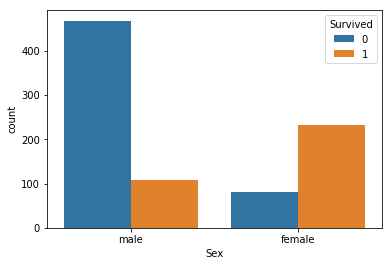

In [17]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

- 女性の方が生き残った確率が高い

## ③説明変数を追加

### 「Name_length・・名前の長さ」の列を追加

In [18]:
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,44
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,24
5,6,0,3,"Moran, Mr. James",male,27,0,0,330877,8.4583,NaN,Q,0,16
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1,23
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,0,30
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,0,49
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,0,35


### 「FamilySize・・家族の人数」の列を追加（SibSp・・兄弟、配偶者の数　Parch・・両親、子どもの数）　　

In [19]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Name_length,FamilySize
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,0,16,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,0,32,2
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,0,25,1
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,0,16,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,0,44,3
5,897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.2250,NaN,S,0,26,1
6,898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,NaN,Q,0,20,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29.0000,NaN,S,0,28,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,NaN,C,0,41,1
9,901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.1500,NaN,S,0,23,3


### 「IsAlone・・タイタニック号に一人で乗っているかどうか」の列を追加（一人のとき1、身内と一緒のとき0）

In [20]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Name_length,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,0,16,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,0,32,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,0,25,1,1
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,0,16,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,0,44,3,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.2250,NaN,S,0,26,1,1
6,898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,NaN,Q,0,20,1,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29.0000,NaN,S,0,28,3,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,NaN,C,0,41,1,1
9,901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.1500,NaN,S,0,23,3,0


### Mr. Mrsなどの敬称について調べる

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Name_length,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,23,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,51,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,44,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,24,1,1


In [22]:
print(train['Name'][0].split(', '))

['Braund', 'Mr. Owen Harris']


In [23]:
print(train['Name'][0].split(', ')[1].split('.')[0])

Mr


In [24]:
print(train['Name'].map(lambda x: x.split(', ')[1].split('.')[0]))

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Name, Length: 891, dtype: object


### 「honorific(敬称)」の列を追加

In [25]:
for dataset in full_data:
    dataset['honorific'] = dataset['Name'].map(lambda x: x.split(', ')[1].split('.')[0])

### 「honorific(敬称)」の列を調整していく

In [26]:
train['honorific'].value_counts().to_frame()

,honorific
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Major,2
Col,2
Mlle,2
Mme,1


In [27]:
test['honorific'].value_counts().to_frame()

,honorific
Mr,240
Miss,78
Mrs,72
Master,21
Rev,2
Col,2
Ms,1
Dr,1
Dona,1


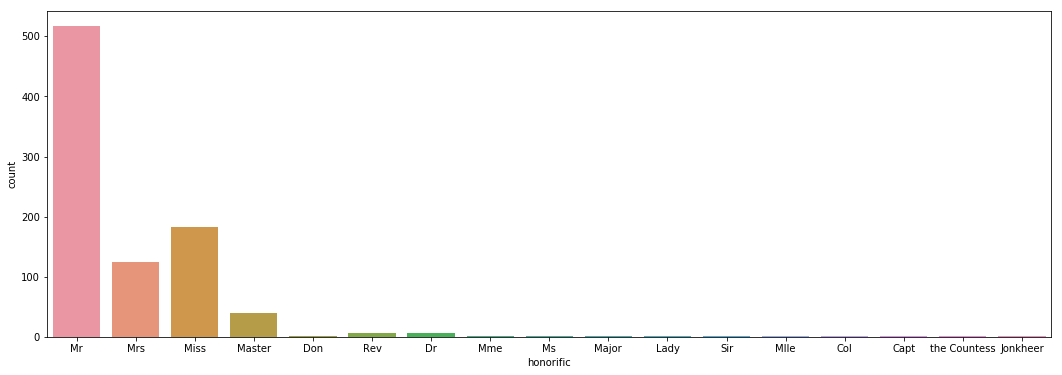

In [28]:
# 可視化
plt.figure(figsize=(18,6))
sns.countplot(x='honorific', data=train)
plt.show()

### あまり使われない敬称を'Rare'で置換

In [29]:
for dataset in full_data:
    dataset['honorific'].replace('Mlle', 'Miss', inplace=True) #Missに統合
    dataset['honorific'].replace('Ms', 'Miss', inplace=True) #Missに統合
    dataset['honorific'].replace(['Don','Rev','Dr','Mme','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer','Dona'],'Rare', 
                                 inplace=True)

## ④不要な説明変数を削除しデータを整える

### 不要な説明変数を削除

In [30]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(drop_elements, axis=1)
test = test.drop(drop_elements, axis=1)

In [31]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Name_length,FamilySize,IsAlone,honorific
0,0,3,male,22,7.2500,S,0,23,2,0,Mr
1,1,1,female,38,71.2833,C,1,51,2,0,Mrs
2,1,3,female,26,7.9250,S,0,22,1,1,Miss
3,1,1,female,35,53.1000,S,1,44,2,0,Mrs
4,0,3,male,35,8.0500,S,0,24,1,1,Mr
5,0,3,male,27,8.4583,Q,0,16,1,1,Mr
6,0,1,male,54,51.8625,S,1,23,1,1,Mr
7,0,3,male,2,21.0750,S,0,30,5,0,Master
8,1,3,female,27,11.1333,S,0,49,3,0,Mrs
9,1,2,female,14,30.0708,C,0,35,2,0,Mrs


In [32]:
test

,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Name_length,FamilySize,IsAlone,honorific
0,3,male,34,7.8292,Q,0,16,1,1,Mr
1,3,female,47,7.0000,S,0,32,2,0,Mrs
2,2,male,62,9.6875,Q,0,25,1,1,Mr
3,3,male,27,8.6625,S,0,16,1,1,Mr
4,3,female,22,12.2875,S,0,44,3,0,Mrs
5,3,male,14,9.2250,S,0,26,1,1,Mr
6,3,female,30,7.6292,Q,0,20,1,1,Miss
7,2,male,26,29.0000,S,0,28,3,0,Mr
8,3,female,18,7.2292,C,0,41,1,1,Mrs
9,3,male,21,24.1500,S,0,23,3,0,Mr


### ダミー変数化

In [33]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [34]:
train

,Survived,Pclass,Age,Fare,Has_Cabin,Name_length,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,honorific_Master,honorific_Miss,honorific_Mr,honorific_Mrs,honorific_Rare
0,0,3,22,7.2500,0,23,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,38,71.2833,1,51,2,0,1,0,1,0,0,0,0,0,1,0
2,1,3,26,7.9250,0,22,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,35,53.1000,1,44,2,0,1,0,0,0,1,0,0,0,1,0
4,0,3,35,8.0500,0,24,1,1,0,1,0,0,1,0,0,1,0,0
5,0,3,27,8.4583,0,16,1,1,0,1,0,1,0,0,0,1,0,0
6,0,1,54,51.8625,1,23,1,1,0,1,0,0,1,0,0,1,0,0
7,0,3,2,21.0750,0,30,5,0,0,1,0,0,1,1,0,0,0,0
8,1,3,27,11.1333,0,49,3,0,1,0,0,0,1,0,0,0,1,0
9,1,2,14,30.0708,0,35,2,0,1,0,1,0,0,0,0,0,1,0


In [35]:
test

,Pclass,Age,Fare,Has_Cabin,Name_length,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,honorific_Master,honorific_Miss,honorific_Mr,honorific_Mrs,honorific_Rare
0,3,34,7.8292,0,16,1,1,0,1,0,1,0,0,0,1,0,0
1,3,47,7.0000,0,32,2,0,1,0,0,0,1,0,0,0,1,0
2,2,62,9.6875,0,25,1,1,0,1,0,1,0,0,0,1,0,0
3,3,27,8.6625,0,16,1,1,0,1,0,0,1,0,0,1,0,0
4,3,22,12.2875,0,44,3,0,1,0,0,0,1,0,0,0,1,0
5,3,14,9.2250,0,26,1,1,0,1,0,0,1,0,0,1,0,0
6,3,30,7.6292,0,20,1,1,1,0,0,1,0,0,1,0,0,0
7,2,26,29.0000,0,28,3,0,0,1,0,0,1,0,0,1,0,0
8,3,18,7.2292,0,41,1,1,1,0,1,0,0,0,0,0,1,0
9,3,21,24.1500,0,23,3,0,0,1,0,0,1,0,0,1,0,0


### trainデータとtestデータを保存する

In [36]:
train_saved = train.copy()
test_saved = test.copy()

In [37]:
def load_data():
    train, test = train_saved, test_saved
    return train, test

## ⑤モデル作成
1. ロジスティック回帰
2. 決定木
3. ランダムフォレスト
4. XGBoost
5. LightGBM
6. Neural Network
7. keras
8. n-近傍法

In [38]:
from sklearn.model_selection import KFold

In [39]:
train_x = train.drop('Survived', axis=1)
train_y = train['Survived']
test_x = test

In [50]:
kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]
tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

### 1. ロジスティク回帰

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.metrics import log_loss

In [51]:
lr = LogisticRegression()
lr.fit(tr_x, tr_y)
lr_va_pred = lr.predict_proba(va_x)[:,1]
print(f'logloss:{log_loss(va_y, lr_va_pred)}')

logloss:0.4183156170321345


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2. 決定木

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(max_depth=3, random_state=71)
dt.fit(tr_x, tr_y)
dt_va_pred = dt.predict_proba(va_x)[:,1]
print(f'logloss:{log_loss(va_y, dt_va_pred)}')

logloss:0.4389256768218324


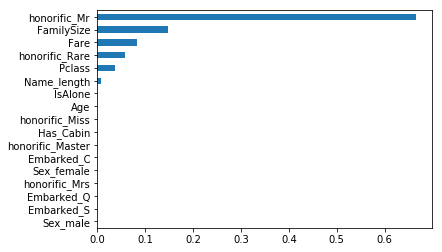

In [49]:
# 重要度の抽出
feature_importances = pd.Series(dt.feature_importances_, index=tr_x.columns).sort_values(ascending=True)
feature_importances[0:20].sort_values().plot.barh()
plt.show()

### 3. ランダムフォレスト

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# グリッドサーチに必要なライブラリを読み込み
from sklearn.model_selection import GridSearchCV

In [52]:
# 探索するパラメータを設定
params = {
        'n_estimators' : [50, 100, 150],
        'max_depth' : [ 5, 10, 15,],
        'min_samples_split' : [2, 5, 10, 15],
        'min_samples_leaf' : [2, 4, 6],
        'random_state'      : [71]
}

# グリッドサーチの実行
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid = params,
                    scoring='accuracy', n_jobs=-1, iid=False, cv=10
)
grid.fit(tr_x, tr_y)

# グリッドサーチ結果の表示
print(grid.best_params_, grid.best_score_)

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 100, 'random_state': 71} 0.8367347753212547


In [53]:
rf = RandomForestClassifier(
  max_depth=10,
  min_samples_leaf=4,
  n_estimators=100,
  min_samples_split=15,
  n_jobs=-1,
  random_state=71)
rf.fit(tr_x, tr_y)
rf_va_pred = rf.predict_proba(va_x)
print(f'logloss:{log_loss(va_y, rf_va_pred)}')

logloss:0.3892508542443405


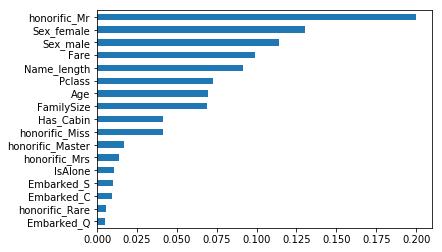

In [54]:
feature_importances = pd.Series(rf.feature_importances_, index=tr_x.columns).sort_values(ascending=True)
feature_importances[0:20].sort_values().plot.barh()
plt.show()

### 4. XGBoost

In [55]:
from xgboost.sklearn import XGBClassifier

In [56]:
param_space = {
    'n_estimator':[15,20,25],
    'max_depth':[3, 5, 7, 9],
    'min_child_weight':[2,4,8,16],
}

In [57]:
import itertools

In [58]:
param_combinations = itertools.product(param_space['n_estimator'], param_space['max_depth'], param_space['min_child_weight'])
params = []
scores = []

for n_estimator, max_depth, min_child_weight in param_combinations:
    score_folds = []
    xgb = XGBClassifier(n_estimator=n_estimator, random_state=71, max_depth=max_depth, min_child_weight=min_child_weight) 
    xgb.fit(tr_x, tr_y)
    xgb_va_pred = xgb.predict_proba(va_x)[:, 1]
    logloss = log_loss(va_y, xgb_va_pred)
    
    params.append((n_estimator, max_depth, min_child_weight))
    scores.append(logloss)
    
best_idx = np.argsort(scores)[0]
best_param = params[best_idx]
print(f'n_estimator:{best_param[0]},max_depth:{best_param[1]}, min_child_weight:{best_param[2]}, best_logloss{np.sort(scores)[0]}')

n_estimator:15,max_depth:9, min_child_weight:8, best_logloss0.3785576662967491


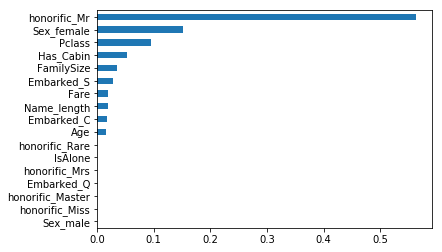

In [59]:
feature_importances = pd.Series(xgb.feature_importances_, index=tr_x.columns).sort_values(ascending=True)
feature_importances[0:20].sort_values().plot.barh()
plt.show()

### 5. lightGBM

In [60]:
import lightgbm as lgb

In [61]:
param_space = {
    'n_estimator':[15,20,25],
    'max_depth':[3, 5, 7, 9],
    'min_child_weight':[2,4,8,16],
}

In [62]:
param_combinations = itertools.product(param_space['n_estimator'], param_space['max_depth'], param_space['min_child_weight'])
params = []
scores = []

for n_estimator, max_depth, min_child_weight in param_combinations:
    score_folds = []
    gbm = lgb.LGBMClassifier(n_estimator=n_estimator, random_state=71, max_depth=max_depth, min_child_weight=min_child_weight) 
    gbm.fit(tr_x, tr_y)
    gbm_va_pred = gbm.predict_proba(va_x)[:, 1]
    logloss = log_loss(va_y, gbm_va_pred)
    
    params.append((n_estimator, max_depth, min_child_weight))
    scores.append(logloss)
    
best_idx = np.argsort(scores)[0]
best_param = params[best_idx]
print(f'n_estimator:{best_param[0]},max_depth:{best_param[1]}, min_child_weight:{best_param[2]}, best_logloss{np.sort(scores)[0]}')

n_estimator:25,max_depth:5, min_child_weight:8, best_logloss0.3786247590773165


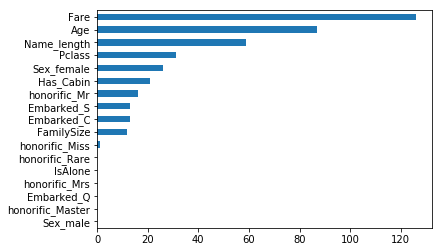

In [63]:
feature_importances = pd.Series(gbm.feature_importances_, index=tr_x.columns)
feature_importances[0:20].sort_values().plot.barh()
plt.show()

### 6.Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
NN = MLPClassifier(random_state=71)
NN.fit(tr_x, tr_y)
NN_va_pred = NN.predict_proba(va_x)[:,1]
print(f'logloss:{log_loss(va_y, NN_va_pred)}')

logloss:0.43938390444927583


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 7.keras

In [66]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [67]:
Scaler = StandardScaler()
Scaler.fit(tr_x)
tr_x2 = Scaler.transform(tr_x)
va_x2 = Scaler.transform(va_x)
test_x2 = Scaler.transform(test_x)

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [68]:
batch_size = 128
epochs = 10
history = model.fit(tr_x2, tr_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(va_x2, va_y))
keras_va_pred = model.predict(va_x2)
keras_test_pred = model.predict(test_x)
score = log_loss(va_y, keras_va_pred)
print(f'logloss:{score:.4f}')

Train on 668 samples, validate on 223 samples
Epoch 1/10
668/668 [==============================] - 1s 2ms/step - loss: 0.6256 - acc: 0.6437 - val_loss: 0.4725 - val_acc: 0.8027
Epoch 2/10
668/668 [==============================] - 0s 49us/step - loss: 0.4653 - acc: 0.7949 - val_loss: 0.4269 - val_acc: 0.8027
Epoch 3/10
668/668 [==============================] - 0s 46us/step - loss: 0.4296 - acc: 0.8129 - val_loss: 0.4180 - val_acc: 0.8386
Epoch 4/10
668/668 [==============================] - 0s 43us/step - loss: 0.4097 - acc: 0.8338 - val_loss: 0.4156 - val_acc: 0.8475
Epoch 5/10
668/668 [==============================] - 0s 45us/step - loss: 0.4058 - acc: 0.8338 - val_loss: 0.4178 - val_acc: 0.8341
Epoch 6/10
668/668 [==============================] - 0s 61us/step - loss: 0.3925 - acc: 0.8398 - val_loss: 0.4073 - val_acc: 0.8341
Epoch 7/10
668/668 [==============================] - 0s 45us/step - loss: 0.3863 - acc: 0.8443 - val_loss: 0.4095 - val_acc: 0.8341
Epoch 8/10
668/668 [====

### 8. k-nn近傍法

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(tr_x, tr_y)
knn_va_pred = knn.predict_proba(va_x)
print(f'logloss{log_loss(va_y, knn_va_pred)}')

logloss0.5144353664290872


## ⑥アンサンブル学習

In [75]:
lr_test_pred = lr.predict_proba(test_x)[:,1]
rf_test_pred = rf.predict_proba(test_x)[:,1]
xgb_test_pred = xgb.predict_proba(test_x)[:,1]
gbm_test_pred = gbm.predict_proba(test_x)[:,1]
NN_test_pred = knn.predict_proba(test_x)[:,1]

In [76]:
test_pred = lr_test_pred*0.1 + rf_test_pred*0.6 + xgb_test_pred*0.1 + gbm_test_pred*0.1 + NN_test_pred*0.1

In [77]:
test_y = np.where(test_pred>0.5, 1, 0)
test_y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [78]:
submission = pd.DataFrame({'PassengerId': PassengerId, 
                           'Survived': test_y})

In [79]:
submission.to_csv('submission.csv', index=False)